Equipo 003

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./database-sucia-citi.csv')
df.head()

,Institution Name,Main Office,Branch Name,Established Date (MMDDYYY),Acquired Date(MMDDYYY),Street Address,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,Citi Bank,0,boston branch,4 de enero de 2003,08/16/2008,"50 ROWES WHARF, FLOOR 4",Suffolk,MA,2110.0,42.35597,-71.04981,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Citi Bank,0,milford (ford street) branch,09/16/1967,07/14/1996,370 BOSTON POST ROAD,New Haven,CT,6460.0,41.22554,-73.07122,82623.0,83772.0,86838.0,86705.0,87268.0,89086.0,99210
2,Citi Bank,0,milford banking center branch,7 de enero de 2010,NaN,1651 BOSTON POST ROAD,NaN,CT,6460.0,41.24752,-73.02523,NaN,5102.0,11847.0,18696.0,24017.0,28134.0,33414
3,Citi Bank,0,monroe ct branch,8 de agosto de 1979,07/14/1996,456 MONROE TURNPIKE,Fairfield,CT,6468.0,41.31428,-73.21837,63203.0,66795.0,68238.0,76666.0,79725.0,82839.0,84911
4,Citi Bank,0,newtown branch,12/28/1974,07/14/1996,30 CHURCH HILL ROAD,Fairfield,CT,6470.0,41.41458,-73.30159,51729.0,58509.0,65722.0,76224.0,84761.0,87607.0,100543


In [3]:
df.columns

Index(['Institution Name', 'Main Office', 'Branch Name',
       'Established Date (MMDDYYY)', 'Acquired Date(MMDDYYY)',
       'Street Address', 'County', 'State', 'Zipcode', 'Latitude', 'Longitude',
       '2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits',
       '2014 Deposits', '2015 Deposits', '2016 Deposits'],
      dtype='object')

In [4]:
data = {'branch_key': list(range(1,df.shape[0]+1)),
        'branch_name': df['Branch Name'],
        'branch_address': df['Street Address'],
        'branch_city': df['County'],
        'branch_state': df['State'],
        'branch_zip': df['Zipcode']
        }
branch_df = pd.DataFrame(data)

In [5]:
branch_df.head()

,branch_key,branch_name,branch_address,branch_city,branch_state,branch_zip
0,1,boston branch,"50 ROWES WHARF, FLOOR 4",Suffolk,MA,2110.0
1,2,milford (ford street) branch,370 BOSTON POST ROAD,New Haven,CT,6460.0
2,3,milford banking center branch,1651 BOSTON POST ROAD,NaN,CT,6460.0
3,4,monroe ct branch,456 MONROE TURNPIKE,Fairfield,CT,6468.0
4,5,newtown branch,30 CHURCH HILL ROAD,Fairfield,CT,6470.0


In [24]:
branch_df.to_csv('branch.csv', index=False)

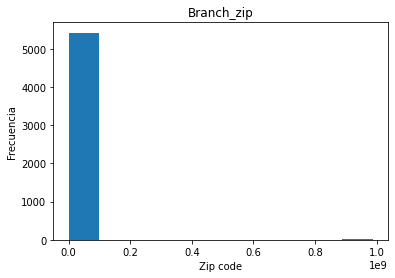

In [8]:
import matplotlib.pyplot as plt

plt.hist(branch_df.branch_zip)
plt.title('Branch_zip')
plt.xlabel('Zip code')
plt.ylabel('Frecuencia')
plt.show()

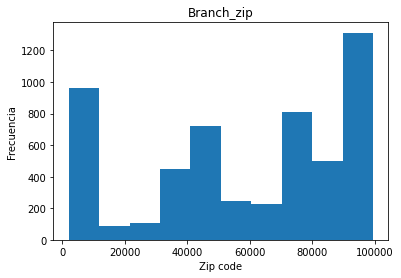

In [10]:
plt.hist(branch_df[branch_df.branch_zip < 1e6].branch_zip)
plt.title('Branch_zip')
plt.xlabel('Zip code')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
branch_df.branch_zip

0       2110.0
1       6460.0
2       6460.0
3       6468.0
4       6470.0
         ...  
5440    6890.0
5441    6897.0
5442    6897.0
5443    6897.0
5444    6901.0
Name: branch_zip, Length: 5445, dtype: float64

In [19]:
dup = branch_df[branch_df.iloc[:,1:].duplicated()]
print(dup.count())

branch_key        29
branch_name       29
branch_address    29
branch_city       19
branch_state      18
branch_zip        29
dtype: int64


In [20]:
dup.head()

,branch_key,branch_name,branch_address,branch_city,branch_state,branch_zip
5413,5414,cos cob banking center branch,371 EAST PUTNAM AVENUE,Fairfield,CT,6807.0
5414,5415,stony hill branch,111 NEWTON ROAD,Fairfield,CT,6810.0
5415,5416,danbury shoprite branch,"1-A PADANARAMA ROAD, NORTH STREET SC",Fairfield,CT,6811.0
5416,5417,danbury lake ave branch,42 LAKE AVE EXT,NaN,CT,6811.0
5417,5418,federal road danbury,99 FEDERAL ROAD,NaN,CT,6811.0
